# Midterm I


## 2020-11-03

---
---

### Requirements

- All of the answers must be explained and justified by either tests, model output, or charts;
- If you are testing a hypothesis - write down the **null** and the **alternative** hypothesis; Also **clearly** state the results of the test.
- If you estimate a model, or carry out a test and make some conclusions based on it - indicate **the reason** that these conclusions are based on (e.g. $p$-value, $t$-statistic, residuals, plots, etc. some other test results, model functional form, coefficient interpretation, etc.);
- You should understand what your code does and how it works. You are also responsible that your code **is correctly working**.
- Plots, Charts, etc. should be readable, with clear explanations - either by including a legend or writing a couple of sentences explaining which colors correspond to which data/models/forecasts of interest. **Do not be afraid to comment the charts** - what do you see from the plots - is everything as you expect, do you identify any **potential** problems?
- **Important!** Do not forget to use `np.random.seed(STUDENT_CODE)` if you need to sample or simulate data, where `STUDENT_CODE` is **your** student code.

- Your solutions have to be coherent - i.e. if one task requires to select the best model, then the next task requires to write down the equation and the third one requires to carry out some model testing - clearly state what model you chose, **and why**, and use **only that model**, **unless the tasks specify otherwise**.

- **If a task REQUIRES you to provide comments on the results - providing only code without explanation of the results does NOT count as a solution**.

---
---

## Some recommended packages

Below are some recommended packages which you should load in your Python Notebook environment.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as sm_diagnostic
import statsmodels.stats.stattools as sm_tools
# May also need, depending on the methods used:
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Additional methods for output formatting
from statsmodels.compat import lzip
# Additional method for pcustom lot legend creation
from matplotlib.lines import Line2D

The packages should load without errors (there might sometimes be **warnings** about deprecated functions - these will usually not matter to us).

You can also add any other libraries that you will be using below.

In [ ]:
# If needed, load any additional packages here

---

---

## Function to generate the dataset

Below is the function, which will be used to generate a dataset for you.

In [4]:
def genr_data(s_code):
    try:
        s_code
    except NameError:
        sys.exit("STUDENT_CODE not Defined!")
    #  
    if isinstance(s_code, list):
        STUDENT_CODE = STUDENT_CODE[0]
    #
    if not isinstance(s_code, int):
        sys.exit("STUDENT_CODE is not an integer!")
    # 
    np.random.seed(s_code)
    #
    N = np.random.choice([130, 140, 160, 180], size = 1)[0]
    #
    min_val = np.random.choice([0, 1], size = 1)[0]
    max_val = np.random.choice([50, 100], size = 1)[0]
    x = np.random.choice(np.round(np.linspace(start = min_val, stop = max_val, endpoint = True, num = 300), 2), size = N, replace = True)
    #
    e = np.random.normal(loc = 0, scale = np.random.choice([0.1, 0.15, 0.2], size = N))
    #
    coef_type = np.random.uniform(low = 0, high = 1, size = 1)[0]
    if coef_type < 1 / 2:
        beta_coef = [np.random.choice([1, 1.2, 1.6], size = 1)[0], np.random.choice([0.05, 0.04, 0.06], size = 1)[0]]
        name_x = np.random.choice(["product_investment", "advertisement_expenditure"])
    else:
        beta_coef = [np.random.choice([1, 1.2, 1.6], size = 1)[0], -np.random.choice([0.05, 0.04, 0.06], size = 1)[0]]
        name_x = np.random.choice(["cost_of_labor", "product_price"], size = 1)[0]
    #
    name_y = np.random.choice(["product_consumption", "revenue", "product_output"], size = 1)[0]
    if name_y == "revenue":
        y_type = "EUR"
    else:
        y_type = "tonnes"
    #
    if min_val != 0:
        y = np.exp(beta_coef[0] + beta_coef[1]  * 5 * np.log(x) + e)
    else:
        y = np.exp(beta_coef[0] + beta_coef[1] * x  + e)
    #
    DT = pd.DataFrame([y, x]).T
    DT.columns = [name_y, name_x]
    #
    dt_index = list(range(0, len(DT.index)))
    smpl_index = np.random.choice(dt_index, size = int(np.floor(0.8 * len(DT))), replace = False)
    #
    DT_tr = DT.iloc[smpl_index, :].reset_index(drop = True)
    DT_te = DT.iloc[list(set(dt_index) - set(smpl_index)), :].reset_index(drop = True)
    #
    #
    fig, ax = plt.subplots(figsize = (15, 4))
    # Some text to plot
    textstr = '$\mathrm{STUDENT}\_\mathrm{CODE}=%.d$\n$\mathrm{DT}\ \mathrm{sample}\ \mathrm{size}\ \ =%.d$'%(s_code, len(DT.index))
    textstr = textstr + '\nDependent  variable Y = "' + name_y + '" (in thousands of ' + y_type + ') \nExplanatory variable X = "' + name_x + '" (in hundreds of EUR)'
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # Plot the text:
    ax.text(0.05, 0.6, textstr, transform=ax.transAxes, fontsize = 20, verticalalignment='top', bbox=props)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    #ax.set_facecolor('xkcd:blue')
    plt.show()
    #
    #
    return (DT_tr, DT_te)

---

---

## DATASET

Depending on the variables that you get you should treat:


$X$ as (depending on the variable selected):
- `product_investment` as the amount invested in researching and improving a product;
- `advertisement_expenditure` - the amount spent on advertisements of a product;
- `cost_of_labor` - the sum of all wages paid to employees, including the cost of employee benefits and payroll taxes paid by an employer;
- `product_price` - the price of the product being sold

$Y$ as (depending on the variable selected):
- `product_consumption` - the amount of product consumed by the customers
- `revenue` - the revenue from product sales
- `product_output` - the amount of products created (but not necessarily sold)

---


**Replace** `YOUR_STUDENT_CODE` with your student code and run the following code to get your data sample:

In [1]:
STUDENT_CODE = 2009687

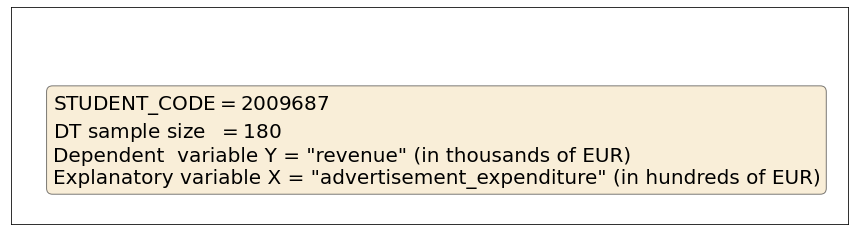

In [5]:
DT_train, DT_test = genr_data(STUDENT_CODE)

You will have the following datasets:
- `DT_train` - the training set, that you need to use to estimate the model coefficients;
- `DT_test`  - the testing set, that you will use to see how your model performs on new data.

Use the data to estimate a model, which shows how the values of $X$ explain the values of $Y$.

---

---

## TASK 1

**Use the training set, `DT_train`**:

- Examine the histogram of $Y$ - does it visually resemble a histogram of a variable from a normal distribution?
- Examine the histogram of $X$ - does it visually resemble a histogram of a variable from a normal distribution?
- Examine the scatterplot of $Y$ and $X$ - is there a relationship between $X$ and $Y$? Does it appear to be linear?

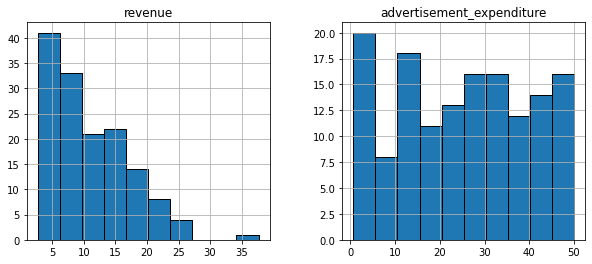

In [6]:
fig = plt.figure(num = 2, figsize = (10, 4))
_ = DT_train[['revenue']].hist(ec = 'black', ax = fig.add_subplot(121)) 
_ = DT_train[['advertisement_expenditure']].hist(ec = 'black', ax = fig.add_subplot(122)) 
plt.show()

In the histogram of Y most of the data are on the left side, with almost no data on the right. Therefore, the histogram of Y does not visually resemble a histogram of a variable from a normal distribution.

In the histogram of X the data are more or less evenly spread from left to right, therefore it does not visually resemble a histogram of a variable from a normal distribution.

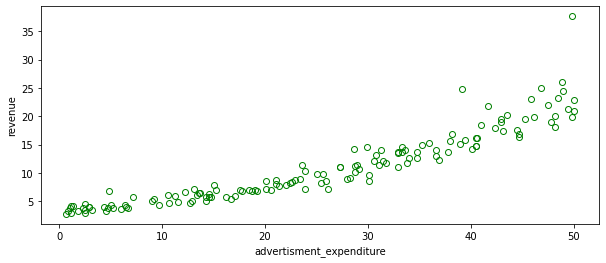

In [7]:
plot_opts = dict(linestyle = "None", marker = "o", markerfacecolor = "None")
fig = plt.figure(num = 2, figsize = (10, 4))
_ = plt.plot(DT_train[['advertisement_expenditure']], DT_train[['revenue']], color = "green", **plot_opts)
_ = plt.xlabel("advertisment_expenditure")
_ = plt.ylabel("revenue")
plt.show()

There is a relationship between Y and X: Y increases as X increases. The relationship does not appear to be linear.

## TASK 2

- What functional form(-s) could be used to describe the relationship between $Y$ and $X$?
- Explain what sign would you expect the coefficient of $X$ (i.e. $\beta_1$) to have and why?

The relationship between Y and X could be described as exponential.

The scatterplot shows that Y increases as X increases, therefore I expect the coefficient of X to be positive.

## TASK 3

**Use the training set, `DT_train`**:

- Estimate at least two models for the relationship between $Y$ and $X$. 
- **For each model**, examine the model summary output and answer the following:
    - Write down the null and alternative hypothesis for the coefficient of $X$ significance testing. 
    - Is the coefficient $\widehat{\beta}_1$ statistically significant? 
    - Is the sign of $\widehat{\beta}_1$ the same as you expected?

In [10]:
print(DT_train[["advertisement_expenditure","revenue"]].describe())

       advertisement_expenditure     revenue
count                 144.000000  144.000000
mean                   25.261319   10.918265
std                    14.854598    6.392844
min                     0.670000    2.726450
25%                    13.295000    5.807854
50%                    25.755000    9.078063
75%                    37.832500   14.812527
max                    50.000000   37.675428


The minimum value of X is 0.670000, the minumum value of Y is 2.726450. Therefore the LinLog, LogLin and LogLog models can be used. We estimate the Linear and LogLin models.

In [159]:
lm_fit_linear = sm.OLS((DT_train['revenue']), sm.add_constant(DT_train['advertisement_expenditure'])).fit() 
print(lm_fit_linear.summary2().tables[1].round(4))

                            Coef.  Std.Err.        t   P>|t|  [0.025  0.975]
const                      0.8708    0.4038   2.1564  0.0327  0.0725  1.6692
advertisement_expenditure  0.3977    0.0138  28.8368  0.0000  0.3705  0.4250


In [160]:
lm_fit_loglin = sm.OLS(np.log(DT_train["revenue"]), sm.add_constant(DT_train['advertisement_expenditure'])).fit() 
print(lm_fit_loglin.summary2().tables[1].round(4))

                            Coef.  Std.Err.        t  P>|t|  [0.025  0.975]
const                      1.2201    0.0233  52.2954    0.0  1.1740  1.2662
advertisement_expenditure  0.0395    0.0008  49.5502    0.0  0.0379  0.0411


Null and alternative hypothesis for the coefficient of X significance testing.

$\begin{cases}
H_0&: \beta_i = 0 \\
H_1&: \beta_i \neq 0
\end{cases}$

If H0 is not rejected, there is no relationship between Y and X. If H0 is rejected, there is a relationship between Y and X.

P-value=0.0000 means that if the null hypothesis were true, the probability of observing such a t-value is 0.000. P-value<0.05, therefore we reject the null hypothesis and conclude that advertisement_expenditure has a significant impact on revenue in both models.

As expected, β1>0 in all the models, therefore advertisement_expenditure has a positive effect on revenue.

## TASK 4

- Examine the residual plots:
    - scatterplots of residuals vs fitted, residuals vs X, 
    - residual histogram, 
    - Q-Q plot
    
of your specified models and comment on the results;

In [89]:
def plot_resid(resid, y_fit, x, plt_title, plt_row, plt_pos, fig):
    plot_opts = dict(linestyle = "None", marker = "o", markerfacecolor = "None")
    ax = fig.add_subplot(plt_row, 5, plt_pos)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(right = False, top = False, left = False, bottom= False) 
    ax.text(0.5, 0.5, plt_title, horizontalalignment='center',verticalalignment='center') 
    ax = fig.add_subplot(plt_row, 5, plt_pos + 1)
    stats.probplot(resid, dist = "norm", plot = ax)
    # Plot histogram of residuals
    ax = fig.add_subplot(plt_row, 5, plt_pos + 2)
    ax.hist(resid, color = "cornflowerblue", bins = 25, ec = 'black') 
    plt.title("Histogram of residuals")
    # Plot residual vs Fitted plot
    ax = fig.add_subplot(plt_row, 5, plt_pos + 3)
    ax.plot(y_fit, resid, color = "black", **plot_opts)
    plt.title("Residuals vs Fitted values")
    # Plot residual vs X plot
    ax = fig.add_subplot(plt_row, 5, plt_pos + 4)
    ax.plot(x, resid, color = "black", **plot_opts) 
    plt.title("Residuals vs X")
    fig = plt.figure(num = 4, figsize = (16, 8))

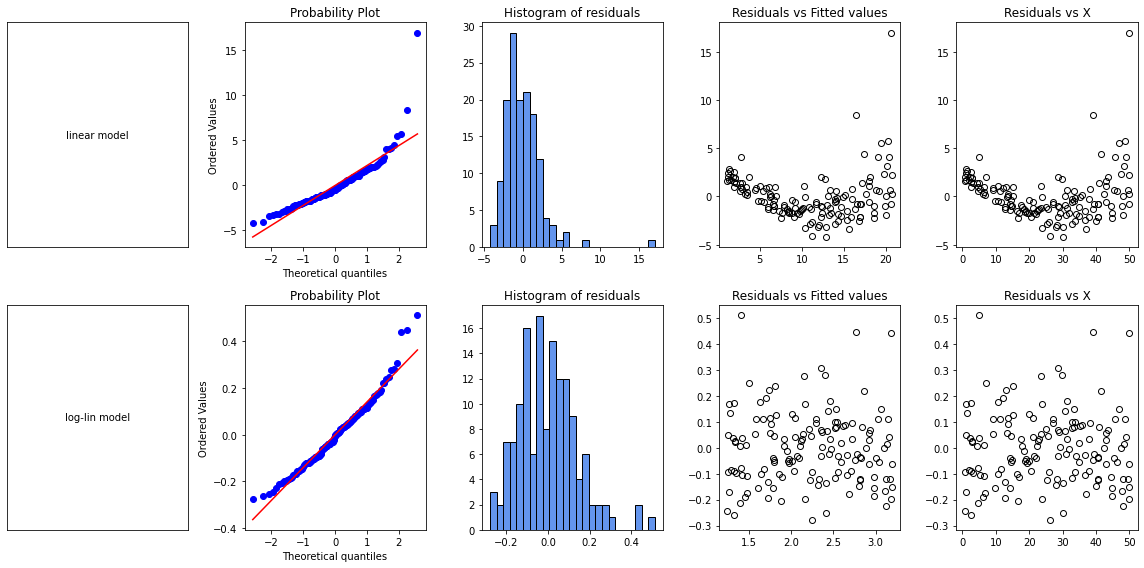

In [90]:
fig = plt.figure(num = 4, figsize = (16, 8))
plot_resid(lm_fit_linear.resid, lm_fit_linear.fittedvalues, DT_train['advertisement_expenditure'],"linear model", 2, 1, fig)
plot_resid(lm_fit_loglin.resid, lm_fit_loglin.fittedvalues, DT_train['advertisement_expenditure'],"log-lin model", 2, 6, fig)
plt.tight_layout() 
plt.show()

Linear Model: the residuals on the Q-Q plot do not fall along a straight line with the theoretical quantiles of a normal distribution. In the histogram the residual distribution is skewed to the right hand side of the histogram, therefore the residuals do not have a normal distribution. In the scatterplots the residuals present a clear pattern, suggesting that the linear model is not a good fit for the data.

LogLin Model: the residuals on the Q-Q plot do not fall along a straight line with the theoretical quantiles of a normal distribution. In the histogram, the distrubution of residuals looks almost like a normal distribution, even tough it is skewed to the right side. In the scatterplots, the residuals appear to be scattered randomly around zero.

## TASK 5

- Carry out homoskedasticity (heteroskedasticity), autocorrelation and normality tests. What is the null hypothesis for each test? 
- What do the test results say about the residuals and the test statistics of your models?

Test for Residual Homoskedasticity: Breusch-Pagan Test

$\begin{aligned}
H_0&: \text{ residuals are homoskedastic}\\
H_1&: \text{ residuals are heteroskedastic}
\end{aligned}$

In [91]:
name = ['LM statistic', 'LM p-value', 'F-value', 'F p-value']
test = sm_diagnostic.het_breuschpagan(
resid = lm_fit_linear.resid, exog_het = sm.add_constant(DT_train[["advertisement_expenditure"]]))
print(pd.DataFrame([np.round(test, 6)], columns = name))
test = sm_diagnostic.het_breuschpagan(
resid = lm_fit_loglin.resid, exog_het = sm.add_constant(DT_train[["advertisement_expenditure"]]))
print(pd.DataFrame([np.round(test, 6)], columns = name))

   LM statistic  LM p-value   F-value  F p-value
0       5.48713    0.019157  5.625271   0.019045
   LM statistic  LM p-value  F-value  F p-value
0      0.104415    0.746594  0.10304   0.748684


Linear Model: p-value<0.05, the null hypothesis is rejected. The residuals are heteroskedastic. Therefore, the error term ε does not have the same variance given any value of the explanatory variable.

Loglin Model: p-value>0.05, the null hypothesis is not rejected. The residuals are homoskedastic. Therefore, the error term ε has the same variance given any value of the explanatory variable.

Test for Residual Aurocorrelation: Breusch-Godfrey Test

$\begin{aligned}
H_0&: \text{ residuals are serially uncorrelated}\\
H_1&: \text{ residuals are autocorrelated}
\end{aligned}$

In [92]:
name = ['LM-statistic', 'p-value', 'F-value', 'F p-value']
test = sm_diagnostic.acorr_breusch_godfrey(lm_fit_linear, nlags = 2) 
print(pd.DataFrame([np.round(test, 6)], columns = name)[['LM-statistic', 'p-value']])
test = sm_diagnostic.acorr_breusch_godfrey(lm_fit_loglin, nlags = 2) 
print(pd.DataFrame([np.round(test, 6)], columns = name)[['LM-statistic', 'p-value']])

   LM-statistic   p-value
0      1.851448  0.396244
   LM-statistic   p-value
0      1.589309  0.451737


Linear Model: p-value>0.05, the null hypothesis is not rejected. The residuals are serially uncorrelated. Therefore, the error terms are not correlated across observations.

Loglin Model: p-value>0.05, the null hypothesis is not rejected. The residuals are serially uncorrelated. Therefore, the error terms are not correlated across observations.

Test for Residual Normality: Shapiro-Wilk Test

$\begin{aligned}
H_0&: \text{ residuals follow a normal distribution}\\
H_1&: \text{ residuals do not follow a normal distribution}
\end{aligned}$

In [93]:
name = ['W-statistic', 'p-value']
test = stats.shapiro(x = lm_fit_linear.resid) 
print(pd.DataFrame([np.round(test, 6)], columns = name))
test = stats.shapiro(x = lm_fit_loglin.resid) 
print(pd.DataFrame([np.round(test, 6)], columns = name))

   W-statistic  p-value
0     0.814212      0.0
   W-statistic   p-value
0     0.967051  0.001533


Linear Model: p-value<0.05, therefore the null hypothesis is rejected. The residuals do not follow a normal distribution.

Loglin Model: p-value<0.05, therefore the null hypothesis is rejected. The residuals do not follow a normal distribution.

Test for Residual Normality: Jarque-Bera Test

$\begin{aligned}
H_0&: \text{ residuals follow a normal distribution}\\
H_1&: \text{ residuals do not follow a normal distribution}
\end{aligned}$

In [94]:
name = ['JB statistic', 'p-value', 'skewness', 'kurtosis']
test = sm_tools.jarque_bera(lm_fit_linear.resid) 
print(pd.DataFrame([np.round(test, 6)], columns = name))
test = sm_tools.jarque_bera(lm_fit_loglin.resid) 
print(pd.DataFrame([np.round(test, 6)], columns = name))

   JB statistic  p-value  skewness   kurtosis
0    1642.59459      0.0  2.782239  18.582116
   JB statistic   p-value  skewness  kurtosis
0     20.449108  0.000036  0.731439  4.126132


Linear Model: p-value<0.05, therefore the null hypothesis is rejected. The residuals do not follow a normal distribution.

Loglin Model: p-value<0.05, therefore the null hypothesis is rejected. The residuals do not follow a normal distribution.

## TASK 6

Select the *best* model and explain your decision.

Both the linear and loglin models present serially uncorrelated residuals.
Both the linear and loglin models present residuals that are not normally distributed.
The linear model presents heteroskedastic residuals, while the loglin model presents  homoskedastic residuals.

We can therefore conclude that the loglin model is the best out of the two models estimated.

## TASK 7

- Write down the equation - with the estimated coefficients and their standard errors - of your selected *best* model from `TASK 6`.
- Provide an interpretation for the coefficient of the independent variable (i.e. $\beta_1$) for your selected model.

$\underset{(se)}{\widehat{\log(\text{revenue})}} = \underset{(0.0233)}{1.2201} + \underset{(0.0008)}{0.0395} \cdot \text{advertisement_expenditure}$

An increase of 100EUR in X (advertisement_expenditure) results in an increase of 0.0395 * 100 = 3.95% in Y (revenue).

## TASK 8

- Calculate the predicted values and prediction intervals for `DT_train` and `DT_test` (separately) (Note: **do not** print all the values - print the first 5 - 8 predicted values with their prediction intervals);

In [101]:
fit_train = lm_fit_loglin.get_prediction(sm.add_constant(DT_train["advertisement_expenditure"])) 
fit_train = fit_train.summary_frame(alpha = 0.05)
print (np.exp(fit_train.head(8)))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  22.390813  1.021740      21.458800      23.363305     16.871443   
1  11.416358  1.012666      11.135820      11.703964      8.620357   
2  15.062792  1.015574      14.609600      15.530042     11.367384   
3  14.382768  1.014979      13.966185      14.811777     10.855531   
4   3.840772  1.021410       3.683256       4.005023      2.894292   
5   5.936893  1.014829       5.766622       6.112192      4.481062   
6  22.684470  1.021965      21.730766      23.680030     17.091589   
7   4.075119  1.020407       3.915585       4.241152      3.071751   

   obs_ci_upper  
0     29.715804  
1     15.119238  
2     19.959535  
3     19.056096  
4      5.096766  
5      7.865702  
6     30.107510  
7      5.406230  


In [102]:
fit_test = lm_fit_loglin.get_prediction(sm.add_constant(DT_test["advertisement_expenditure"])) 
fit_test = fit_test.summary_frame(alpha = 0.05)
print(np.exp(fit_test.head(8)))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   7.382702  1.012672       7.201195       7.568785      5.574585   
1   4.411715  1.019105       4.249720       4.579885      3.326621   
2   4.469575  1.018896       4.307200       4.638071      3.370430   
3   8.151855  1.012112       7.960141       8.348186      6.155946   
4   3.524002  1.022906       3.369715       3.685354      2.654408   
5   8.206757  1.012085       8.014170       8.403973      6.197434   
6   3.968727  1.020852       3.810075       4.133985      2.991187   
7  13.733445  1.014423      13.350136      14.127761     10.366600   

   obs_ci_upper  
0      9.777282  
1      5.850751  
2      5.927167  
3     10.794886  
4      4.678478  
5     10.867541  
6      5.265734  
7     18.193768  


## TASK 9

- Plot the predicted values and prediction intervals alongside the true data points in separate plots for `DT_train` and `DT_test`;
- Do most of the data points fall in the $95\%$ prediction intervals in `DT_test`?

In [103]:
sorted_train = np.argsort(DT_train['advertisement_expenditure'])

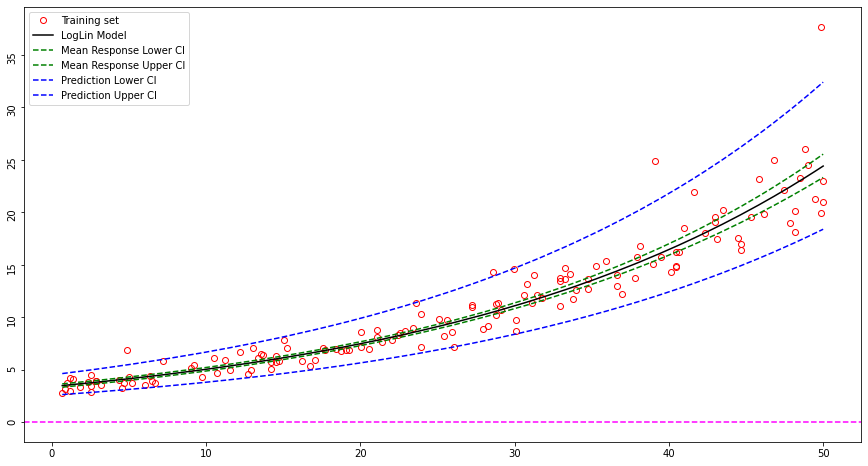

In [104]:
 fig = plt.figure(num = 5, figsize = (15, 8))
_ = plt.plot(DT_train[['advertisement_expenditure']], DT_train[['revenue']], color = "red", **plot_opts,
label = "Training set")
_ = plt.plot(DT_train['advertisement_expenditure'][sorted_train], np.exp(fit_train)['mean'][sorted_train],
linestyle = "-", color = "black", label = "LogLin Model")
_ = plt.plot(DT_train['advertisement_expenditure'][sorted_train], np.exp(fit_train)['mean_ci_lower'][sorted_train],
linestyle = "--", color = "green", label = "Mean Response Lower CI")
_ = plt.plot(DT_train['advertisement_expenditure'][sorted_train], np.exp(fit_train)['mean_ci_upper'][sorted_train],
linestyle = "--", color = "green", label = "Mean Response Upper CI")
_ = plt.plot(DT_train['advertisement_expenditure'][sorted_train], np.exp(fit_train)['obs_ci_lower'][sorted_train],
linestyle = "--", color = "blue", label = "Prediction Lower CI")
_ = plt.plot(DT_train['advertisement_expenditure'][sorted_train], np.exp(fit_train)['obs_ci_upper'][sorted_train],
linestyle = "--", color = "blue", label = "Prediction Upper CI")
_ = plt.axhline(y = 0, linestyle = "--", color = "magenta")
_ = plt.yticks(rotation = 'vertical')
_ = plt.legend(loc = "upper left")
plt.show()

In [105]:
sorted_test = np.argsort(DT_test["advertisement_expenditure"])

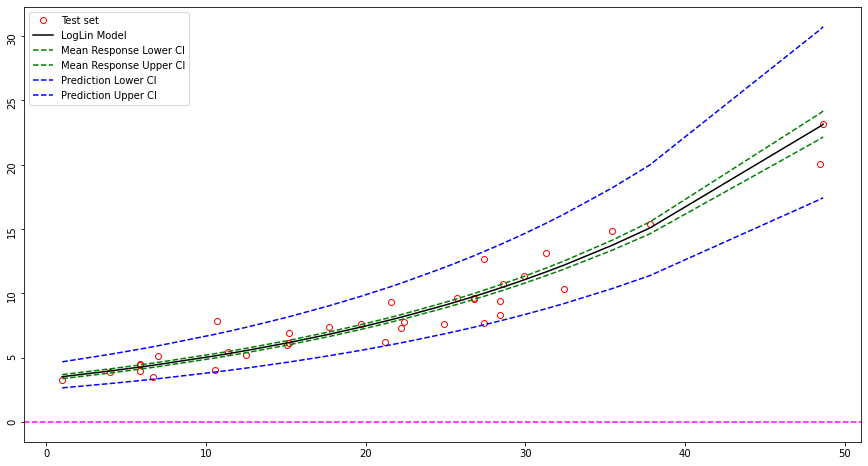

In [106]:
 fig = plt.figure(num = 5, figsize = (15, 8))
_ = plt.plot(DT_test[['advertisement_expenditure']], DT_test[['revenue']], color = "red", **plot_opts,
label = "Test set")
_ = plt.plot(DT_test['advertisement_expenditure'][sorted_test], np.exp(fit_test)['mean'][sorted_test],
linestyle = "-", color = "black", label = "LogLin Model")
_ = plt.plot(DT_test['advertisement_expenditure'][sorted_test], np.exp(fit_test)['mean_ci_lower'][sorted_test],
linestyle = "--", color = "green", label = "Mean Response Lower CI")
_ = plt.plot(DT_test['advertisement_expenditure'][sorted_test], np.exp(fit_test)['mean_ci_upper'][sorted_test],
linestyle = "--", color = "green", label = "Mean Response Upper CI")
_ = plt.plot(DT_test['advertisement_expenditure'][sorted_test], np.exp(fit_test)['obs_ci_lower'][sorted_test],
linestyle = "--", color = "blue", label = "Prediction Lower CI")
_ = plt.plot(DT_test['advertisement_expenditure'][sorted_test], np.exp(fit_test)['obs_ci_upper'][sorted_test],
linestyle = "--", color = "blue", label = "Prediction Upper CI")
_ = plt.axhline(y = 0, linestyle = "--", color = "magenta")
_ = plt.yticks(rotation = 'vertical')
_ = plt.legend(loc = "upper left")
plt.show()

Most of the data in DT_test do fall in the 95% prediction interval, therefore the model seems to be a good fit for the data.